## Homework 4
## Abhishek Kumar
## A20467982
## --------------------------

### Problem 1 

In [95]:
import numpy as np
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [96]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
df = pd.read_csv(r"C:\Users\stuar\Downloads\auto-mpg.data",delim_whitespace=True, names=column_names)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [97]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [98]:
horsepower_miss= df[df.horsepower=='?'].index
df.loc[horsepower_miss]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [99]:
df.replace("?", np.nan, inplace = True)
df.loc[horsepower_miss]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [100]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [101]:
df.horsepower = df.horsepower.apply(pd.to_numeric)
df['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [102]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

Imputed missing vaue with mean value

In [103]:
m = df['horsepower'].mean()
df.loc[horsepower_miss, 'horsepower'] = m
df['horsepower'].unique()

array([130.        , 165.        , 150.        , 140.        ,
       198.        , 220.        , 215.        , 225.        ,
       190.        , 170.        , 160.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        , 113.        , 200.        ,
       210.        , 193.        , 104.46938776, 100.        ,
       105.        , 175.        , 153.        , 180.        ,
       110.        ,  72.        ,  86.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        80.        ,  54.        , 208.        , 155.        ,
       112.        ,  92.        , 145.        , 137.        ,
       158.        , 167.        ,  94.        , 107.        ,
       230.        ,  49.        ,  75.        ,  91.        ,
       122.        ,  67.        ,  83.        ,  78.        ,
        52.        ,  61.        ,  93.        , 148.        ,
       129.        ,  96.        ,  71.        ,  98.  

In [104]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#### Using only continuous fields as features i.e mpg, displacement, horsepower, weight, and acceleration

In [123]:
df_auto = df[["mpg", "displacement", "horsepower", "weight", "acceleration"]]
df_auto.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5


In [124]:
df_auto = pd.DataFrame(df_auto)
df_auto.columns = ["mpg", "displacement", "horsepower", "weight", "acceleration"]
cls = df[["origin"]]

#### Heirarchical Clustering with linkage set to 'average' and affinity set to 'euclidean' 

In [125]:
model = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='euclidean')
f_model = model.fit(df_auto)
labels = f_model.labels_
origin = []

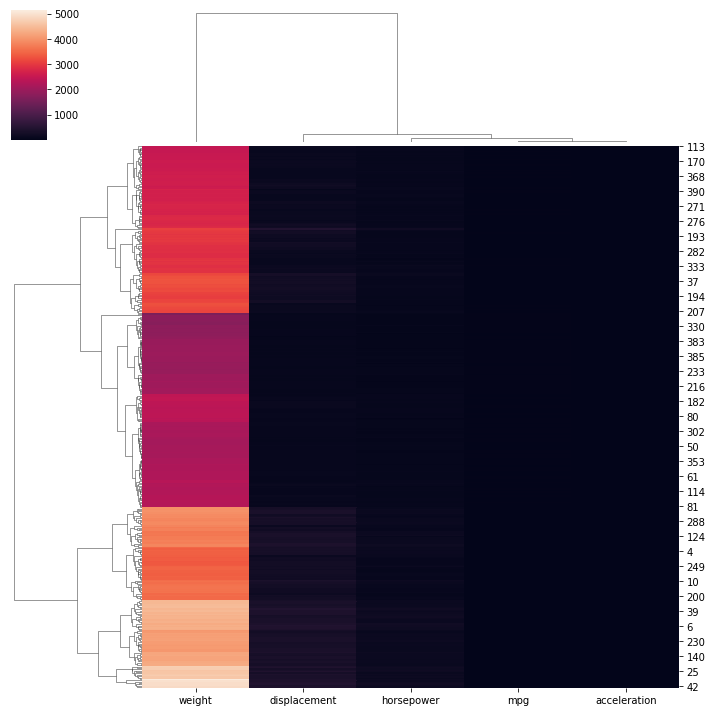

In [126]:
sns.clustermap(df_auto,
               method='average',
               metric='euclidean',
               z_score=None,
               standard_scale=None)

In [127]:
for idx,row in df.iterrows():
    origin.append(row["origin"])

origin = np.array(origin)
df_auto["origin"] = origin
df_auto["cluster_id"] = labels

#zip together labels and origin which are iterator of tuples 
both = zip(labels, origin)

#provide a mapping of labels to group names
group_by_origin = df_auto[["mpg", "displacement", "horsepower", "weight", "acceleration", "origin"]].groupby(by=["origin"])
group_by_cluster = df_auto[["mpg", "displacement", "horsepower", "weight", "acceleration", "cluster_id"]].groupby(by=["cluster_id"])

In [128]:
print("\nMEAN BY CLASS 'ORIGIN'")
print("\n")
print(group_by_origin.mean())
print("\n")
print("\nMEAN BY CLUSTER")
print("\n")
print(group_by_cluster.mean())


MEAN BY CLASS 'ORIGIN'


              mpg  displacement  horsepower       weight  acceleration
origin                                                                
1       20.083534    245.901606  118.814769  3361.931727     15.033735
2       27.891429    109.142857   81.241983  2423.300000     16.787143
3       30.450633    102.708861   79.835443  2221.227848     16.172152



MEAN BY CLUSTER


                  mpg  displacement  horsepower       weight  acceleration
cluster_id                                                                
0           27.365414    131.934211   84.300061  2459.511278     16.298120
1           13.889062    358.093750  167.046875  4398.593750     13.025000
2           17.510294    278.985294  124.470588  3624.838235     15.105882


### Conclusion:
#### We can see that when each function is grouped by Origin and Cluster ID, the mean does not provide much insight, but we can see that the mean acceleration between clusters and origin groups, for example, is very similar to each other when compared to the other features, and we can consider it as noise. 

In [129]:
print("\n\nVARIANCE BY CLASS 'ORIGIN': ")
print("\n")
print(group_by_origin.var())
print("\n\nVARIANCE BY CLUSTER :")
print("\n")
print(group_by_cluster.var())



VARIANCE BY CLASS 'ORIGIN': 


              mpg  displacement   horsepower         weight  acceleration
origin                                                                   
1       40.997026   9702.612255  1569.532304  631695.128385      7.568615
2       45.211230    509.950311   410.659789  240142.328986      9.276209
3       37.088685    535.465433   317.523856  102718.485881      3.821779


VARIANCE BY CLUSTER :


                  mpg  displacement  horsepower         weight  acceleration
cluster_id                                                                  
0           41.976309   2828.083391  369.143491  182632.099872      5.718298
1            3.359085   2138.213294  756.521577   74312.340278      3.591429
2            8.829892   2882.492318  713.088674   37775.809263     10.556980


#### We can see that there is low variance in clusters 1 and 2 for mpg, and this shows that it was probably a strong factor in splitting between cluster 0 and clusters 1 and 2. Again we see little variation in acceleration accross all clusters and origin classes, and can call it noise.

In [121]:
categories = {
    0:[],
    1:[],
    2:[]
}
for lbl, orgn in both:
    categories[lbl].append(orgn)

print("\nOrigin : ", "1".ljust(3), "2".ljust(3), "3".ljust(3))
print("-------------------")
print("Class 0: ", str(categories[0].count(1)).ljust(3), str(categories[0].count(2)).ljust(3), str(categories[0].count(3)).ljust(3))
print("Class 1: ", str(categories[1].count(1)).ljust(3), str(categories[1].count(2)).ljust(3), str(categories[1].count(3)).ljust(3))
print("Class 2: ", str(categories[2].count(1)).ljust(3), str(categories[2].count(2)).ljust(3), str(categories[2].count(3)).ljust(3))


Origin :  1   2   3  
-------------------
Class 0:  120 67  79 
Class 1:  64  0   0  
Class 2:  65  3   0  


### Conclusion:
####  By choosing 3 clusters, we do not neccesarily get 3 distinct clusters that match up 1 to 1 with the target class variable origin.
#### However, it clearly show that almost every object belonged to either Origin 2 or 3, belongs to Class label 0.
#### This means Clusters 1 and 2 were probably sub-clusters that contained points that did not have attributes that would most likely lead to it of having Origin 2 or 3



### -----------------------------------------
###  Problem 2

In [227]:
from sklearn.datasets import load_boston
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [228]:

df = load_boston()

bstn_df = pd.DataFrame(df.data, columns=df.feature_names)
print("\n\nBefore Scaling\n")
print(bstn_df)

print("\n\nAfter Scaling\n")
bstn_df = pd.DataFrame(data=preprocessing.scale(df.data), columns=df.feature_names)
print(bstn_df)




Before Scaling

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90 

In [229]:
x = [2, 3, 4, 5, 6]
y = []
for k in x:
    model = KMeans(n_clusters=k)
    results = model.fit_predict(bstn_df)
    score =silhouette_score(bstn_df,results)
    y.append(score)
    print("k = ",k, "--> Clusters Silhouette Score:",score)


k =  2 --> Clusters Silhouette Score: 0.36011768587358606
k =  3 --> Clusters Silhouette Score: 0.2574894522739468
k =  4 --> Clusters Silhouette Score: 0.2809804562187518
k =  5 --> Clusters Silhouette Score: 0.2878157430985236
k =  6 --> Clusters Silhouette Score: 0.2624844891297077


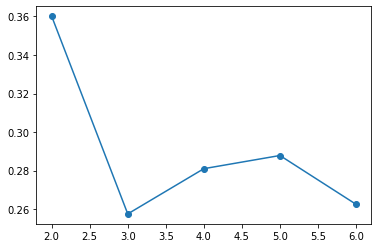

In [230]:
plt.scatter(x, y)
plt.plot(x, y)

#### Conclusion:
#### If use k= 2 clusters, then it would be optimal as it represents the "elbow in the curve" and which provides us the lowest silhoutte score for the least amount of clusters.

In [237]:
k_optimal  = 2
optimal_cluster = KMeans(n_clusters = k_optimal)
results = optimal_cluster.fit_predict(bstn_df)
bstn_df["ClusterId"] = results
print("CENTROID COORDINATES are as follows:\n\n",optimal_cluster.cluster_centers_)

CENTROID COORDINATES are as follows:

 [[-3.90123955e-01  2.62391667e-01 -6.20367590e-01  2.91182143e-03
  -5.84675117e-01  2.43314756e-01 -4.35108186e-01  4.57222255e-01
  -5.83801146e-01 -6.31459930e-01 -2.85808255e-01  3.26451059e-01
  -4.46420611e-01  1.27675648e-15]
 [ 7.25145657e-01 -4.87722365e-01  1.15311264e+00 -5.41236864e-03
   1.08676900e+00 -4.52263020e-01  8.08760413e-01 -8.49865096e-01
   1.08514450e+00  1.17373060e+00  5.31248113e-01 -6.06793212e-01
   8.29787463e-01  1.00000000e+00]]


In [238]:
print("\n\nMEAN FOR EACH FEATURE BY CLUSTER:")
bstn_df.groupby(by="ClusterId").mean()



MEAN FOR EACH FEATURE BY CLUSTER:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
ClusterId,,,,,,,,,,,,,
0,-0.390124,0.262392,-0.620368,0.002912,-0.584675,0.243315,-0.435108,0.457222,-0.583801,-0.631460,-0.285808,0.326451,-0.446421
1,0.725146,-0.487722,1.153113,-0.005412,1.086769,-0.452263,0.808760,-0.849865,1.085145,1.173731,0.531248,-0.606793,0.829787


#### Coclusion:
#### The Means for each each feature of all clusters are actually the same as the Centroid Coordinates.
 

### ---------------------
###  Problem 3

In [239]:
from sklearn.datasets import load_wine
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [240]:
wine_Data = load_wine()

In [241]:
wine_Df = pd.DataFrame(wine_Data.data, columns = wine_Data.feature_names)
wine_Df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [242]:

wine_Df = pd.DataFrame(data=preprocessing.scale(wine_Data.data), columns =wine_Data.feature_names)
wine_Df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [243]:
model = KMeans(n_clusters=3)
results = model.fit_predict(wine_Df)
print(results)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [244]:
print("Homogeneity score for optimal k-  :",homogeneity_score(results, wine_Data.target))
print("Completeness score for optimal k- :",completeness_score(results, wine_Data.target))

Homogeneity score for optimal k-  : 0.8729636016078731
Completeness score for optimal k- : 0.8788432003662366


#### Homogeneity   : Each cluster contains only members of a single class.
#### Completeness : All members of a given class are assigned to the same cluster.
#### Higher they will be, better optimal it is.